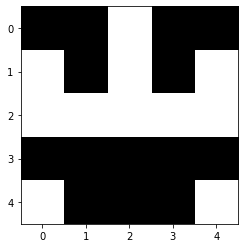

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

sprite = np.zeros((5,5))

for i in range(5):
    for j in range(3):
        sprite[i,j] = random.randint(0,1)
        sprite[i,4-j] = sprite[i,j]

plt.imshow(sprite, cmap='gray')
plt.show()


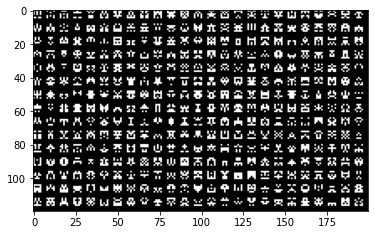

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
 
def draw_sprite(canvas, x, y):
    sprite = np.zeros((5,5))
 
    for i in range(5):
        for j in range(3):
            sprite[i,j] = random.randint(0,1)
            sprite[i,4-j] = sprite[i,j]
    canvas[x:x+5,y:y+5] = sprite
 

d1 = 15
d2 = 25
canvas = np.zeros((d1*5+d1*3,d2*5+d2*3))
for i in range(0, d1*5+d1*3, 8):
    for j in range(0, d2*5+d2*3, 8):
        draw_sprite(canvas, i, j)
 
plt.imshow(canvas, cmap='gray')
plt.show()


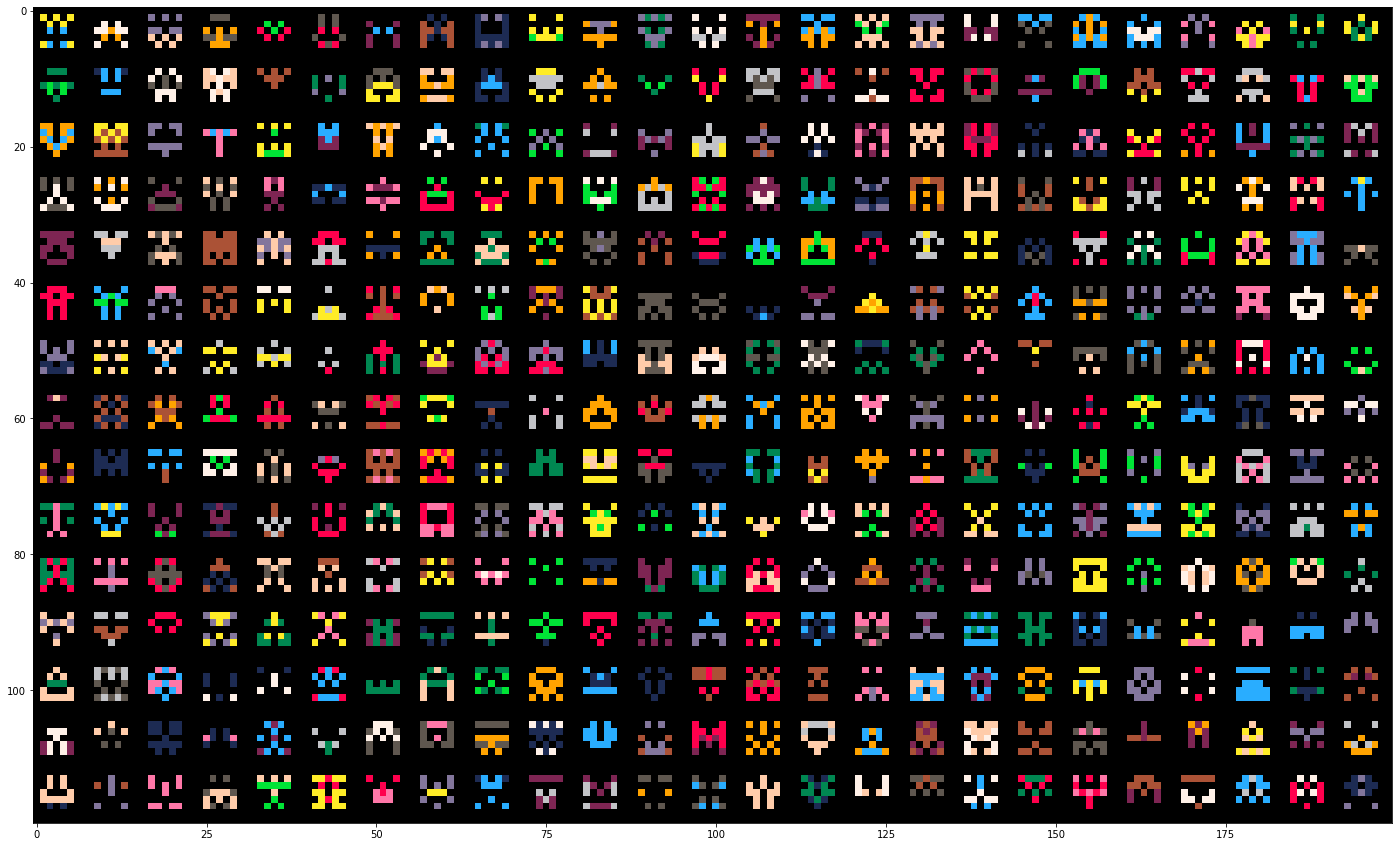

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
 
colors = [
    (29, 43, 83),   # Темно-синий
    (126, 37, 83),  # Темно-малиновый
    (0, 135, 81),   # Темно-зеленый
    (171, 82, 54),  # Темно-коричневый
    (95, 87, 79),   # Темно-серый
    (194, 195, 199),# Светло-серый
    (255, 241, 232),# Светло-кремовый
    (255, 0, 77),   # Ярко-красный
    (255, 163, 0),  # Ярко-оранжевый
    (255, 236, 39), # Ярко-желтый
    (0, 228, 54),   # Ярко-зеленый
    (41, 173, 255), # Ярко-синий
    (131, 118, 156),# Фиолетовый
    (255, 119, 168),# Розовый
    (255, 204, 170) # Светло-оранжевый
]
 
def draw_sprite(canvas, x, y):
    sprite = np.zeros((5,5))
    c = [np.array(colors[random.randint(0, len(colors)-1)]), 
         np.array(colors[random.randint(0, len(colors)-1)])]
    for i in range(5):
        for j in range(3):
            sprite[i,j] = random.randint(0,1)
            sprite[i,4-j] = sprite[i,j]
    for i in range(5):
        for j in range(5):
            if sprite[i,j] == 1:
                canvas[x+i, y+j] = c[random.randint(0,1)]
                canvas[x+i, y+4-j] = canvas[x+i, y+j]
    canvas[x:x+5,y:y+5][sprite==0] = 0
 

d1 = 15
d2 = 25
canvas = np.zeros((d1*5+d1*3,d2*5+d2*3,3), dtype=np.uint8)
for i in range(1, d1*5+d1*3, 8):
    for j in range(1, d2*5+d2*3, 8):
        draw_sprite(canvas, i, j)
fig = plt.figure(figsize=(d2, d1))
plt.imshow(canvas)
plt.show()

In [1]:
from PIL import Image


def read_img(filename):
    img = Image.open(filename).convert('RGB')
    pixels = [[img.getpixel((x, y)) for x in range(img.width)] for y in range(img.height)]
    return pixels

    

# 2.8

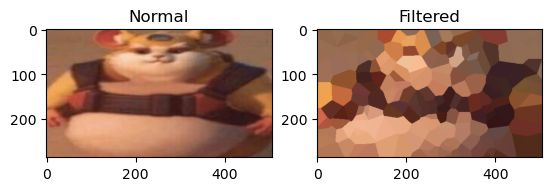

In [55]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt


def read_img(filename):
    img = Image.open(filename).convert('RGB')
    pixels = [[img.getpixel((x, y)) for x in range(img.width)] for y in range(img.height)]
    return pixels

def distance_e(x, y, x0, y0):
    return np.sqrt((x - x0)**2 + (y - y0)**2)
    
    
def voronoi_filter(image_path, n_points):
    image = np.array(read_img(image_path))
    height, width, channels = image.shape
    filtered_image = np.zeros((height, width, channels), dtype=np.uint8)

    points = []
    for i in range(n_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        points.append((x, y))

    for x in range(width):
        for y in range(height):
            distances = []
            for point in points:
                distance = distance_e(x, y, point[0], point[1])
                distances.append(distance)

            min_distance = min(distances)
            min_index = distances.index(min_distance)
            nearest_point = points[min_index]

            filtered_image[y, x] = image[nearest_point[1], nearest_point[0]]

    return filtered_image

n_points = 200
image_path = "maxresdefault12.png"
filtered_image = voronoi_filter(image_path, n_points)
normal_image = np.array(read_img(image_path))

fig, (norm, filt) = plt.subplots(1, 2)

norm.imshow(normal_image)
norm.set_title('Normal')

filt.imshow(filtered_image)
filt.set_title('Filtered')

plt.show()

# 3.11

1994    539
1992    526
1993    493
1990    488
1995    483
1989    442
1991    407
1996    403
1988    316
1997    253
1987    237
1986    115
1984     91
1983     85
1998     82
1985     80
1982     54
1999     38
2001     30
2000     29
2002     17
2003      9
1981      8
2004      4
2005      2
2008      2
2007      1
Name: year, dtype: int64


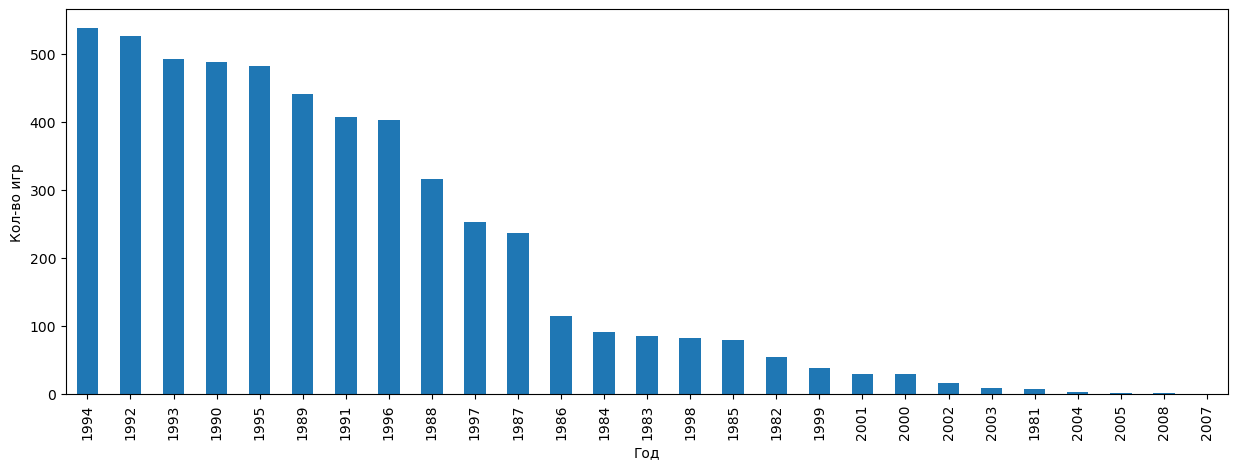

In [34]:
url = "https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv"
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url, header=None, sep=';', names=['title', 'genre', 'link', 'year'])

idx_to_drop = df.loc[df['year'] == "не издана"].index
df = df.drop(index=idx_to_drop)

game_count = df['year'].value_counts()
print(game_count)
game_count.plot(kind='bar', figsize=(15, 5), xlabel='Год', ylabel='Кол-во игр')
plt.show()

# 3.12

genre  Action  Adventure  Arcade  Educational  Fighting  Interactive Fiction  \
year                                                                           
1981      NaN        NaN     1.0          1.0       NaN                  2.0   
1982      2.0        NaN    22.0          1.0       NaN                 12.0   
1983      2.0        1.0    50.0          1.0       NaN                  9.0   
1984      NaN        4.0    39.0          4.0       NaN                 10.0   
1985      NaN        1.0    18.0          NaN       NaN                 16.0   

genre  Other  Puzzle  Quest  RPG  Racing  Simulation  Sports  Strategy  \
year                                                                     
1981     NaN     NaN    NaN  1.0     1.0         NaN     NaN       1.0   
1982     NaN     3.0    1.0  1.0     NaN         3.0     1.0       7.0   
1983     1.0     4.0    NaN  5.0     NaN         NaN     1.0      10.0   
1984     1.0     4.0    1.0  4.0     1.0         5.0     5.0       8.

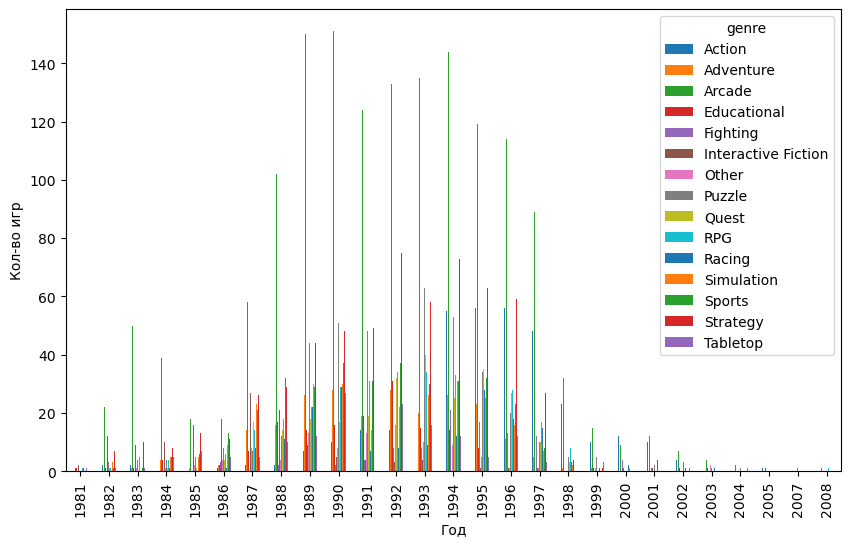

In [50]:
url = "https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv"
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url, header=None, sep=';', names=['title', 'genre', 'link', 'year'])

idx_to_drop = df.loc[df['year'] == "не издана"].index
df = df.drop(index=idx_to_drop)

grouped = df.groupby(['year', 'genre']).size()
print(popularity_by_genre.head())
popularity_by_genre.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

# 3.1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(url):
    df = pd.read_csv(url, header=None, sep=',')
    return df


# id, task, variant, group, time
url_m = "https://raw.githubusercontent.com/true-grue/kispython/main/data/messages.csv"
messages = pd.read_csv(url_m, header=None, sep=',', names=['id', 'task', 'variant', 'group', 'time'])

# id, message_id, time, status
url_c = "https://raw.githubusercontent.com/true-grue/kispython/main/data/checks.csv"
checks = pd.read_csv(url_c, header=None, sep=',', names=['id', 'message_id', 'time', 'status'])

# task, variant, group, time, status, achievements
url_s = "https://raw.githubusercontent.com/true-grue/kispython/main/data/statuses.csv"
statuses = pd.read_csv(url_s, header=None, sep=',')

messages.head()
statuses.head()

,0,1,2,3,4,5
0,0,39,ИВБО-01-21,2023-03-01 09:23:59.531838,3,[]
1,0,38,ИВБО-01-21,2023-02-08 22:10:52.779442,2,[0]
2,0,5,ИКБО-06-21,2023-02-09 10:14:03.199986,2,[2]
3,0,26,ИКБО-06-21,2023-02-09 10:58:38.887360,2,[0]
4,0,21,ИКБО-06-21,2023-02-09 10:24:06.461353,2,[3]


# Воксели!!!!!

In [208]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

'''
0->
|    image[y][x]
v
'''
heightmap = np.array(Image.open("heightmap.png"))
texture = np.array(Image.open("texture.png").convert("RGB"))
viewport = np.zeros((420, 640, 3), dtype=np.uint8)
raycast = texture.copy()

In [209]:
def rays_tv(raycast, x, y, screen_width, z):
    red = (255, 0, 0)
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    dx = round(abs(2 * z / screen_width))
    rays_x = list(range(lp[0], rp[0]+1, dx))
    for yy in range(y-z, y+1):
        for ray_x in rays_x:
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            raycast[yy][xx] = red
                
rays_tv(raycast, 500, 900, 64, 400)

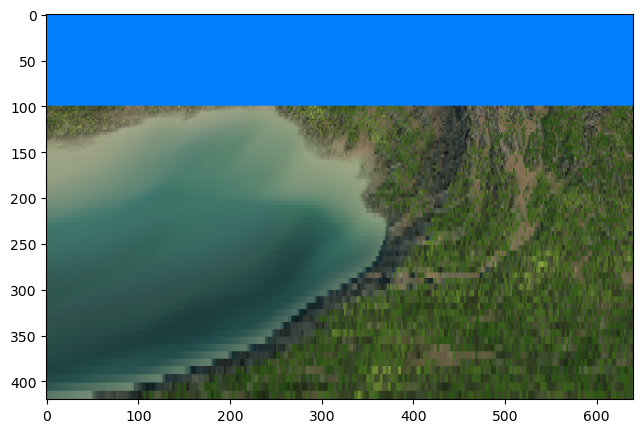

In [291]:
def draw_strips(canvas, colors, start_y):
    height, width, _ = canvas.shape
    screen_width = len(colors)
    for x in range(width):
        for y in range(start_y, height):
            canvas[y][x] = colors[math.floor(x / width * screen_width)]
    

def draw_plane(canvas, x, y, screen_width, z, horizon, texture):
    blue = (0, 127, 255)
    height, width, _ = canvas.shape
    plane = np.zeros((z, screen_width, 3), dtype=np.uint8)
    for xx in range(width):
        for yy in range(height):
            canvas[yy][xx] = blue
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    dx = round(abs(2 * z / screen_width))
    px = int(width / screen_width)
    rays_x = list(range(lp[0], rp[0], dx))
    for yy in range(y-z, y):
        dr_y = yy - y + z + horizon#yy=[500, 899]; 500-900+400+20=20; 899-900+400+20=419
        #print(dr_y)
        for i in range(screen_width):
            ray_x = rays_x[i]
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            color = texture[yy][xx]
            plane[dr_y - horizon][i] = color
    start_y = horizon
    steps = list(range(10))
    while (start_y < height):
        row_n = math.floor((start_y - horizon) / (height - horizon) * math.floor(z * 0.7))
        draw_strips(canvas, plane[row_n], math.floor(start_y))
        start_y += math.floor(start_y / height * 10) 

                
draw_plane(viewport, 500, 900, 600, 400, 100, texture)

fig = plt.figure(figsize=(10, 5))
plt.imshow(viewport)
plt.show()

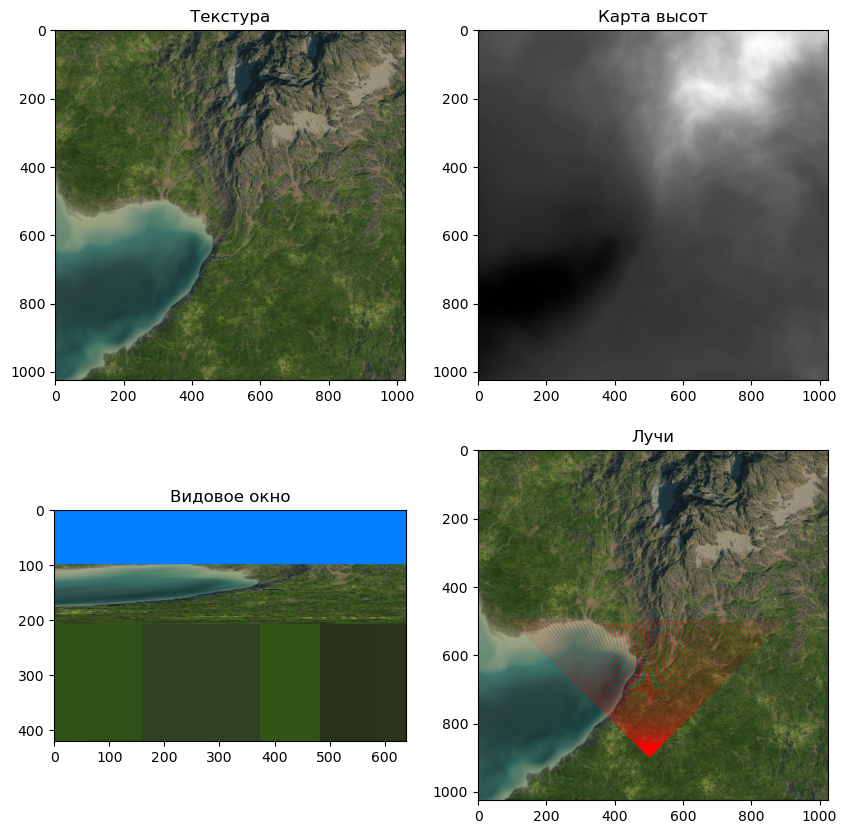

52931
2237


In [279]:
fig, ((texture_fig, heightmap_fig), (viewport_fig, raycast_fig)) = plt.subplots(2, 2, figsize=(10, 10))

texture_fig.imshow(texture)
texture_fig.set_title('Текстура')

heightmap_fig.imshow(heightmap, cmap='gray')
heightmap_fig.set_title('Карта высот')

viewport_fig.imshow(viewport)
viewport_fig.set_title('Видовое окно')

raycast_fig.imshow(raycast)
raycast_fig.set_title('Лучи')

plt.show()

print(max([max(row) for row in heightmap]))
print(min([min(row) for row in heightmap]))